In [2]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [5]:
# Loading and handling missing values from the dataset.
disease_df = pd.read_csv("dataset.csv")
disease_df.drop(columns=["education"], inplace=True, axis=1)
disease_df.rename(columns={"male":"Sex_male"}, inplace=True)

In [6]:
disease_df.dropna(axis=0, inplace=True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [8]:
# Splitting the dataset into Train and Test sets.
X = np.asarray(disease_df[["age", "Sex_male", "cigsPerDay", "totChol", "sysBP", "glucose"]])
y = np.asarray(disease_df["TenYearCHD"])
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape) 

Train set:  (2625, 6) (2625,)
Test set:  (1126, 6) (1126,)


## EDA of Heart Disease Dataset.

C:\Users\jayra\AppData\Local\Temp\ipykernel_14944\650062322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TenYearCHD", data=disease_df, palette="BuGn_r")


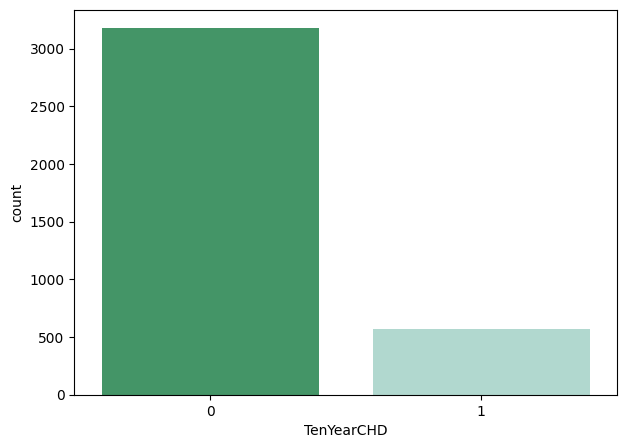

In [12]:
# This shows how many individuals have heart disease (1) vs. how many don’t (0).
plt.figure(figsize=(7, 5))
sns.countplot(x="TenYearCHD", data=disease_df, palette="BuGn_r")
plt.show()

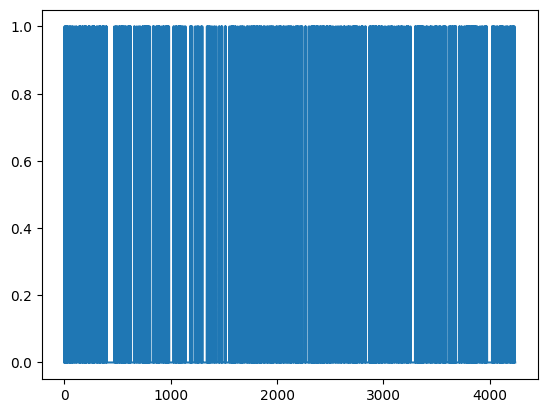

In [11]:
# Counting number of patients affected by CHD where (0= Not Affected; 1= Affected).
laste = disease_df["TenYearCHD"].plot()
plt.show(laste)

## Fitting Logistic Regression Model for Heart Disease Prediction.

In [13]:
# Creating the model.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [14]:
# Evaluating Logistic regression model.
from sklearn.metrics import accuracy_score
print("Accuracy of the Logistic Regression model: ", accuracy_score(y_test, y_pred))

Accuracy of the Logistic Regression model:  0.8490230905861457


The details for Confusion Matrix is: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



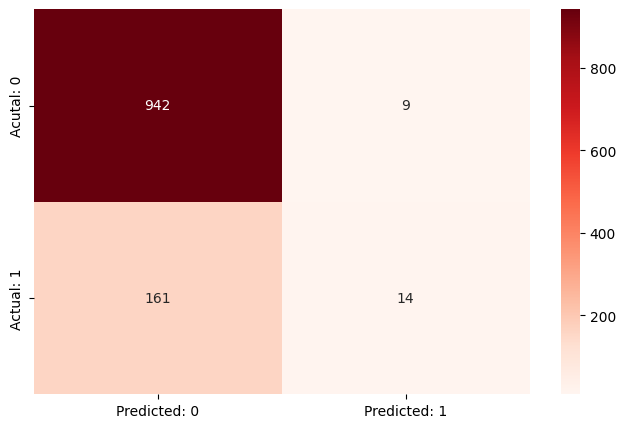

In [17]:
# Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix, classification_report

print("The details for Confusion Matrix is: ")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
con_matrix = pd.DataFrame(data=cm, 
                          columns=["Predicted: 0", "Predicted: 1"], 
                          index=["Acutal: 0", "Actual: 1"])
plt.figure(figsize=(8, 5))
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Reds")

plt.show()